HW 3 Ely Bardavit

---




Problem 1:

Text(0.5, 1.0, 'Plot of Training Data')

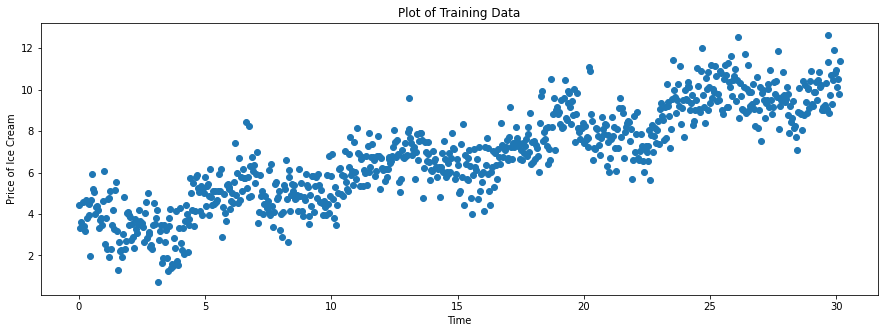

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

trainingData = pd.read_csv('train4.csv')
plt.figure(figsize=(15,5))
plt.scatter(trainingData.Time, trainingData.Price)
plt.xlabel('Time')
plt.ylabel('Price of Ice Cream')
plt.title('Plot of Training Data')

3.191037800253057 [0.23839763]


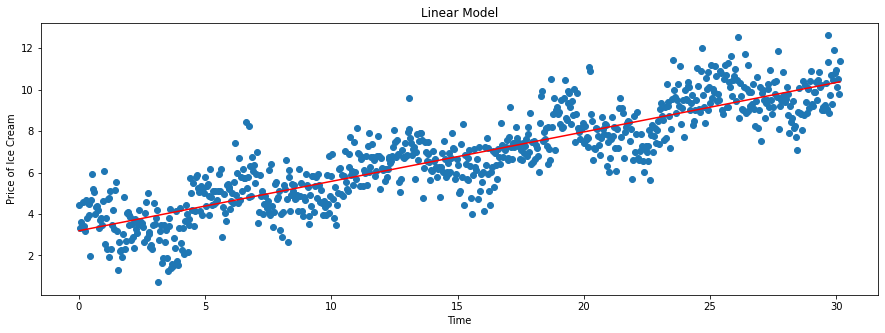

In [ ]:
lineReg = linear_model.LinearRegression()
lineReg.fit(trainingData[['Time']], trainingData.Price)
intercept = lineReg.intercept_
slope = lineReg.coef_
yPredTrain = intercept + slope * trainingData.Time
plt.figure(figsize=(15,5))
plt.scatter(trainingData.Time, trainingData.Price)
plt.plot(trainingData.Time, yPredTrain, color = 'red')
plt.xlabel('Time')
plt.ylabel('Price of Ice Cream')
plt.title('Linear Model')
print(intercept, slope)

Problem 3:

In [ ]:
trainingData['cos(Time)'] = np.cos(trainingData[['Time']])
trainingData['log(Time)'] = np.log(trainingData[['Time']])
trainingData['cos(4 * Time)'] = np.cos(4 * trainingData[['Time']])
trainingData['sin(3 * Time)'] = np.sin(3 * trainingData[['Time']])
trainingData['sin(5 * Time)'] = np.sin(5 * trainingData[['Time']])
trainingData['sin(2 * Time) * cos(2 * Time)'] = np.sin(2 * trainingData[['Time']]) *np.cos(2 * trainingData[['Time']])
trainingData.replace([np.inf, -np.inf], 0, inplace=True)
trainingData

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Time,Price,cos(Time),log(Time),cos(4 * Time),sin(3 * Time),sin(5 * Time),sin(2 * Time) * cos(2 * Time)
0,0.000000,4.456329,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.037737,3.301815,0.999288,-3.277118,0.988629,0.112969,0.187567,0.075187
2,0.075474,3.595955,0.997153,-2.583971,0.954775,0.224491,0.368475,0.148665
3,0.113211,3.401495,0.993599,-2.178506,0.899207,0.333140,0.536305,0.218762
4,0.150947,4.571147,0.988629,-1.890824,0.823190,0.437523,0.685097,0.283883
...,...,...,...,...,...,...,...,...
795,30.000795,10.928634,0.155037,3.401224,0.812331,0.892925,-0.712091,0.291599
796,30.038532,10.106108,0.192198,3.402481,0.715395,0.836350,-0.567764,0.349360
797,30.076268,10.521322,0.229085,3.403736,0.602193,0.769069,-0.403288,0.399175
798,30.114005,9.814676,0.265647,3.404990,0.475293,0.691939,-0.224493,0.439914


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func=f_regression, k=7)
fit= fs.fit(trainingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']], trainingData.Price)
print(fit.pvalues_)

[4.30400110e-265 1.15876481e-006 1.41798880e-152 7.81855039e-001
 9.08705200e-004 5.33402074e-001 4.57791880e-001]


By f regression, we reject all features with a p value that is higher than 0.05.

In [ ]:
import statsmodels.api as sm
fa = sm.OLS(trainingData.Price, trainingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']]).fit()
print(fa.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2787.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:48:32   Log-Likelihood:                         -1415.2
No. Observations:                 800   AIC:                                      2844.
Df Residuals:                     793   BIC:                                      2877.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Thus, we end up with the following features:

In [ ]:
bestReg = linear_model.LinearRegression()
bestReg.fit(trainingData[['Time', 'cos(Time)', 'log(Time)', 'sin(3 * Time)']],trainingData.Price)
print(bestReg.intercept_, bestReg.coef_)

3.0776141030639277 [0.23880149 0.81041575 0.05177415 0.37477766]


So, we get the following equation: Price = 3.0776141030639277 + 0.23880149 * Time + 0.81041575cos(Time) + 0.05177415log(Time) + 0.37477766sin(3Time) .

0.8531113462744083


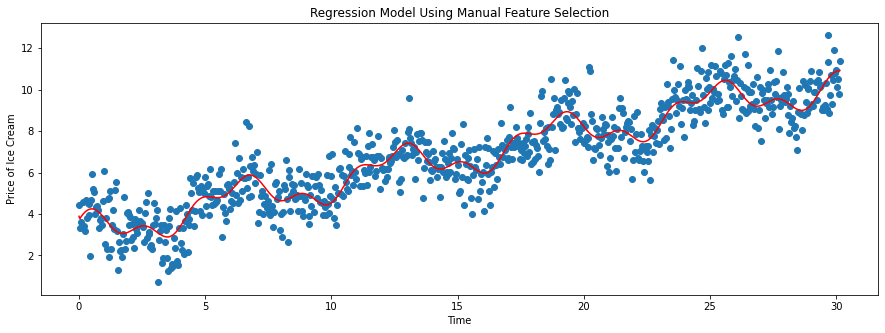

In [ ]:
y_predict_bestReg = bestReg.predict(trainingData[['Time', 'cos(Time)', 'log(Time)', 'sin(3 * Time)']])
plt.figure(figsize=(15,5))
plt.scatter(trainingData.Time, trainingData.Price)
plt.plot(trainingData.Time, y_predict_bestReg, color = 'red')
plt.xlabel('Time')
plt.ylabel('Price of Ice Cream')
plt.title('Regression Model Using Manual Feature Selection')
print(r2_score(trainingData.Price, y_predict_bestReg))

Problem 4:

For Lasso regression:
3.078371479868208 [ 0.23901748  0.81044556  0.05022364 -0.0209724   0.3740592   0.02250694
 -0.02722501]
0.8532162227688564
For Ridge regression:
3.0786308505363986 [ 0.23900387  0.80861714  0.05018455 -0.02111277  0.37338512  0.02264633
 -0.02771521]
0.8532158024311719


Text(0.5, 1.0, 'Ridge Regression Model')

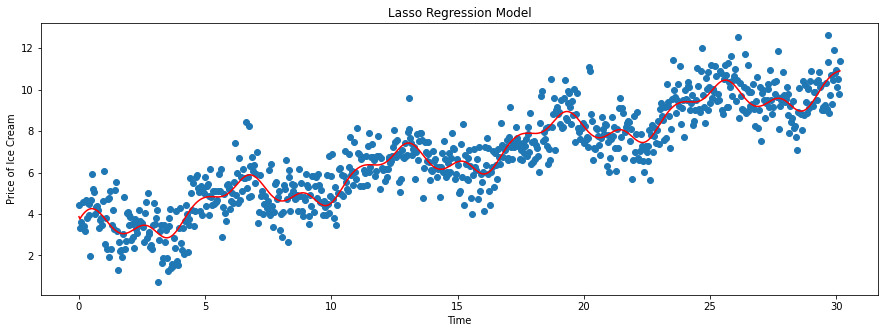

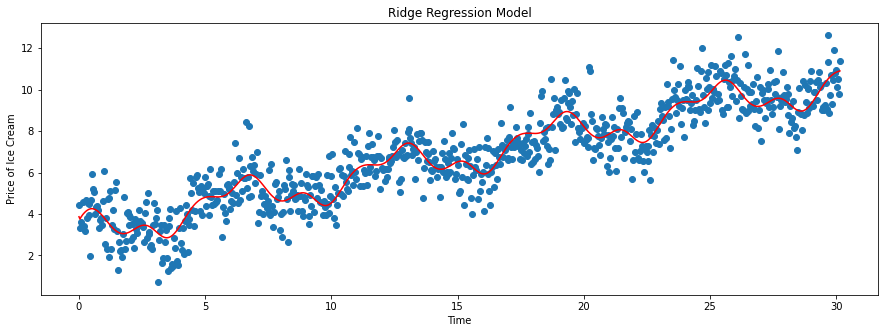

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

lassoReg = linear_model.Lasso(alpha=0.0001, max_iter=1000, tol=0.0001)
lassoReg.fit(trainingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']], trainingData.Price)
print('For Lasso regression:')
print(lassoReg.intercept_, lassoReg.coef_)
lasso_pred = lassoReg.predict(trainingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']])
print(r2_score(trainingData.Price, lasso_pred))
plt.figure(figsize=(15,5))

plt.scatter(trainingData.Time, trainingData.Price)
plt.plot(trainingData.Time, lasso_pred, color = 'red')
plt.xlabel('Time')
plt.ylabel('Price of Ice Cream')
plt.title('Lasso Regression Model')

ridgeReg = Ridge(alpha=1.0, max_iter=1000, tol=0.0001)
ridgeReg.fit(trainingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']], trainingData.Price)
print('For Ridge regression:')
print(ridgeReg.intercept_, ridgeReg.coef_)
ridge_pred = ridgeReg.predict(trainingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']])
print(r2_score(trainingData.Price, ridge_pred))
plt.figure(figsize=(15,5))
plt.scatter(trainingData.Time, trainingData.Price)
plt.plot(trainingData.Time, ridge_pred, color = 'red')
plt.xlabel('Time')
plt.ylabel('Price of Ice Cream')
plt.title('Ridge Regression Model')

Problem 5:

0.42059652414926085


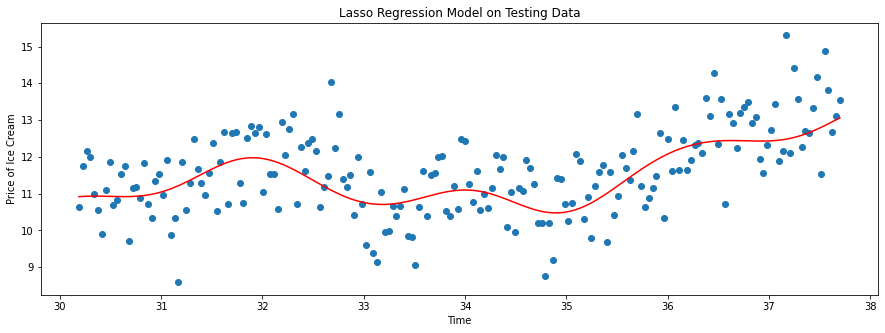

In [ ]:
testingData = pd.read_csv('test.csv')
testingData['cos(Time)'] = np.cos(testingData[['Time']])
testingData['log(Time)'] = np.log(testingData[['Time']])
testingData['cos(4 * Time)'] = np.cos(4 * testingData[['Time']])
testingData['sin(3 * Time)'] = np.sin(3 * testingData[['Time']])
testingData['sin(5 * Time)'] = np.sin(5 * testingData[['Time']])
testingData['sin(2 * Time) * cos(2 * Time)'] = np.sin(2 * testingData[['Time']]) *np.cos(2 * testingData[['Time']])
testingData.replace([np.inf, -np.inf], 0, inplace=True)
modelReg = lassoReg.predict(testingData[['Time', 'cos(Time)', 'log(Time)', 'cos(4 * Time)', 'sin(3 * Time)', 'sin(5 * Time)', 'sin(2 * Time) * cos(2 * Time)']])
plt.figure(figsize=(15,5))
plt.scatter(testingData.Time, testingData.Price)
plt.plot(testingData.Time, modelReg, color = 'red')
plt.xlabel('Time')
plt.ylabel('Price of Ice Cream')
plt.title('Lasso Regression Model on Testing Data')
print(r2_score(testingData.Price, modelReg))